In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

Oleh: Cahya Amalinadhi Putra - **Sekolah Data - Pacmann AI**

# OLS Classification

- Kita akan pakai dataset IRIS
- Lebih rinci pada dataset
  - target 0 adalah spesies Setosa
  - target 1 adalah spesies Virginica
  - target 2 adalah spesies Versicolor

In [2]:
# Load Data Iris
iris = datasets.load_iris()

# Convert ke pandas dataframe agar mudah di edit
iris_df = pd.DataFrame(data=iris.data,
                       columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- Kita akan coba melakukan binary classification
- Kita akan prediksi bunga **Virginica** & **bukan Virginica**
- Untuk **mempermudah visualisasi**, kita hanya memakai **2 fitur**:
  - **sepal length (cm)**
  - **petal length (cm)**

In [3]:
# Buat prediktor (X)
X = iris_df[['sepal length (cm)', 'petal length (cm)']]

print(X)

     sepal length (cm)  petal length (cm)
0                  5.1                1.4
1                  4.9                1.4
2                  4.7                1.3
3                  4.6                1.5
4                  5.0                1.4
..                 ...                ...
145                6.7                5.2
146                6.3                5.0
147                6.5                5.2
148                6.2                5.4
149                5.9                5.1

[150 rows x 2 columns]


In [4]:
# Buat target (y)
# nilai 1 saat spesies-nya virginica
# nilai -1 saat spesies-nya bukan virginica
y = 2*(iris_df['target']==2).astype(int) - 1

print(y)

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 150, dtype: int32


[]

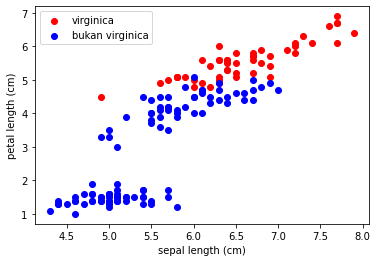

In [5]:
# Visualisasikan data
plt.scatter(X['sepal length (cm)'][y==1], X['petal length (cm)'][y==1],
            c='red', label='virginica')
plt.scatter(X['sepal length (cm)'][y!=1], X['petal length (cm)'][y!=1],
            c='blue', label='bukan virginica')
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.plot()

- Kita akan buat garis yang memisahkan antara titik merah & biru
- Harapannya seperti garis hitam di bawah ini
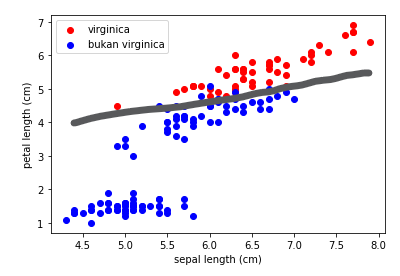

- Garis hitam tersebut kita sebut dengan decision boundary

---
- Bagaimana cara membuat garis nya?
- Misal 
  - `sepal length (cm)` adalah fitur pertama kita, dan kita tulis sebagai $x_1$
  - `petal length (cm)` adalah fitur kedua kita, dan kita tulis sebagai $x_2$
- Maka, persamaan garis tersebut adalah
$$
0 = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2}
$$

- dengan $\theta_{0}$, $\theta_{1}$, dan $\theta_{2}$ adalah parameter model yang memengaruhi intercept dan kemiringan garis (decision boundary kita)

- Artinya, apabila kita memiliki bunga yang nilai $x_1$ dan $x_2$ membuat:
  - $\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} > 0$, dengan kata lain ada **di atas** garis, maka bunga tersebut **ber-spesies virginica**.
  - $\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} < 0$, dengan kata lain ada **di bawah** garis, maka bunga tersebut ber-spesies **bukan** virginica.

---
- Selanjutnya kita buat penyelesaiannya menggunakan OLS

$$
\hat{f}(x) = \text{sign}(\tilde{f}(x))
$$

$$
\tilde{f}(x) = 
\begin{pmatrix}
1 & x_{1}^{(1)} & x_{2}^{(1)} \\
\vdots & \vdots & \vdots \\
1 & x_{1}^{(N)} & x_{2}^{(N)}
\end{pmatrix} \cdot 
\begin{pmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2}
\end{pmatrix}
$$

$$
\tilde{f}(x) = A \cdot \theta
$$

In [6]:
# Buat matriks A (design matrix)
N = len(y)
A = np.column_stack([np.ones(N), X])

A

array([[1. , 5.1, 1.4],
       [1. , 4.9, 1.4],
       [1. , 4.7, 1.3],
       [1. , 4.6, 1.5],
       [1. , 5. , 1.4],
       [1. , 5.4, 1.7],
       [1. , 4.6, 1.4],
       [1. , 5. , 1.5],
       [1. , 4.4, 1.4],
       [1. , 4.9, 1.5],
       [1. , 5.4, 1.5],
       [1. , 4.8, 1.6],
       [1. , 4.8, 1.4],
       [1. , 4.3, 1.1],
       [1. , 5.8, 1.2],
       [1. , 5.7, 1.5],
       [1. , 5.4, 1.3],
       [1. , 5.1, 1.4],
       [1. , 5.7, 1.7],
       [1. , 5.1, 1.5],
       [1. , 5.4, 1.7],
       [1. , 5.1, 1.5],
       [1. , 4.6, 1. ],
       [1. , 5.1, 1.7],
       [1. , 4.8, 1.9],
       [1. , 5. , 1.6],
       [1. , 5. , 1.6],
       [1. , 5.2, 1.5],
       [1. , 5.2, 1.4],
       [1. , 4.7, 1.6],
       [1. , 4.8, 1.6],
       [1. , 5.4, 1.5],
       [1. , 5.2, 1.5],
       [1. , 5.5, 1.4],
       [1. , 4.9, 1.5],
       [1. , 5. , 1.2],
       [1. , 5.5, 1.3],
       [1. , 4.9, 1.4],
       [1. , 4.4, 1.3],
       [1. , 5.1, 1.5],
       [1. , 5. , 1.3],
       [1. , 4.5

In [7]:
# Selesaikan theta dengan OLS
theta_ols = np.linalg.inv(A.T @ A) @ A.T @ y
theta_ols

array([-1.97951614,  0.04509719,  0.36792573])

In [8]:
# Cari hasil prediksi
y_tilde = A @ theta_ols
y_hat = 2 * (y_tilde>0).astype(int) - 1
y_hat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [9]:
# Cek error rate dari confusion matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y, y_hat)
print(conf_mat)

error_rate = 1 - (np.diag(conf_mat).sum()/N)
print(f'error rate = {100*error_rate:.2f} %')

[[87 13]
 [ 1 49]]
error rate = 9.33 %


- Hasilnya lumayan, error ratenya cukup kecil hanya 9.33%

---
**Interpretasi Fisik**

- Kita akan buat 4 grafik
  1. grafik asli (data) - kiri atas
  2. grafik hasil klasifikasi dengan OLS - kanan atas
  3. grafik missklasifikasi - kiri bawah
  4. grafik decision boundary - kanan bawah

---
- untuk membangun persamaan garis decision boundary, kita asumsikan $x_{2}$ sama dengan $y$ dan $x_{1}$ sama dengan $x$
- kemudian tinggal cari persamaan $y = mx + c$
- maka akan kita dapatkan

$$
\begin{align*}
0 &= \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} \\ 
\theta_{2} x_{2} &= - \theta_{1} x_{1} - \theta_{0} \\ 
x_{2} &= - \cfrac{\theta_{1}}{\theta_{2}} x_{1} - \cfrac{\theta_{0}}{\theta_{2}}
\end{align*}
$$

- dengan $m = - \cfrac{\theta_{1}}{\theta_{2}}$ dan $c = - \cfrac{\theta_{0}}{\theta_{2}}$

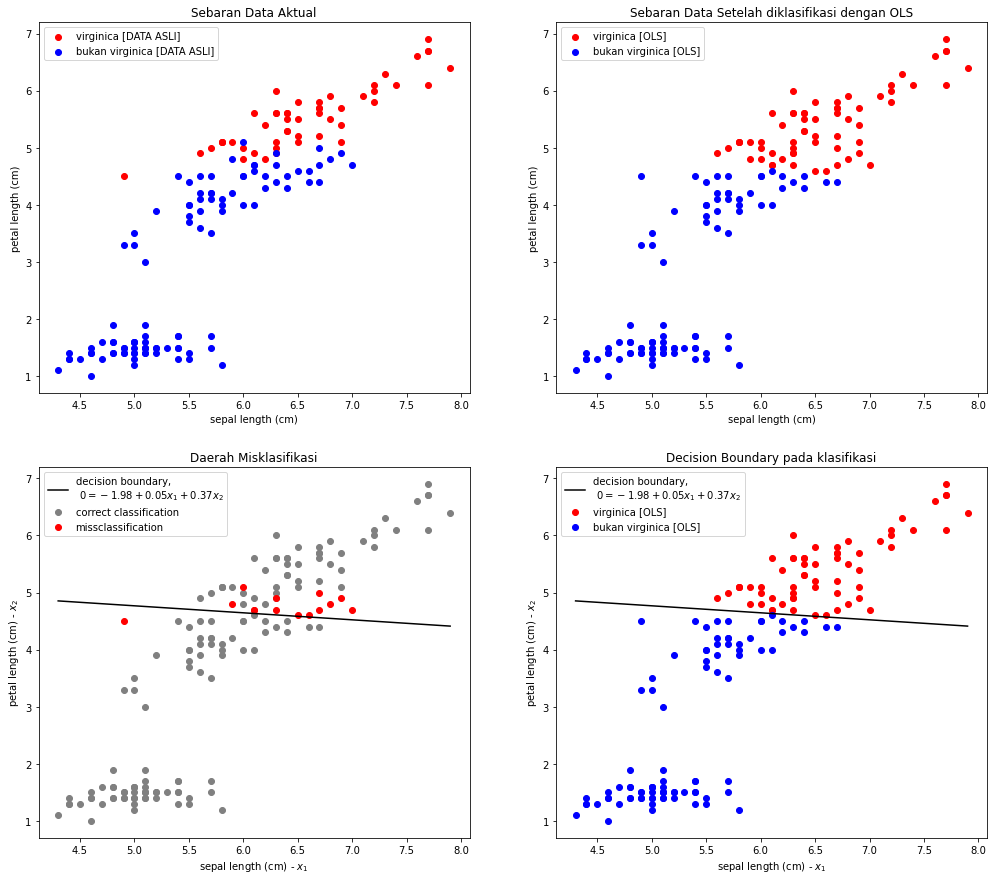

In [15]:
# Perbandingan plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17,15))

# Visualisasi data awal
ax[0,0].scatter(X['sepal length (cm)'][y==1], X['petal length (cm)'][y==1],
              c='red', label='virginica [DATA ASLI]')
ax[0,0].scatter(X['sepal length (cm)'][y!=1], X['petal length (cm)'][y!=1],
              c='blue', label='bukan virginica [DATA ASLI]')
ax[0,0].legend()
ax[0,0].set_xlabel('sepal length (cm)')
ax[0,0].set_ylabel('petal length (cm)')
ax[0,0].set_title('Sebaran Data Aktual')

# Visualisasi data setelah menggunakan OLS Classification
ax[0,1].scatter(X['sepal length (cm)'][y_hat==1], X['petal length (cm)'][y_hat==1],
              c='red', label='virginica [OLS]')
ax[0,1].scatter(X['sepal length (cm)'][y_hat!=1], X['petal length (cm)'][y_hat!=1],
              c='blue', label='bukan virginica [OLS]')
ax[0,1].legend()
ax[0,1].set_xlabel('sepal length (cm)')
ax[0,1].set_ylabel('petal length (cm)')
ax[0,1].set_title('Sebaran Data Setelah diklasifikasi dengan OLS')

# Visualisasi data yang misklasifikasi
m = -theta_ols[1]/theta_ols[2]
c = -theta_ols[0]/theta_ols[2]
x_1_support = np.linspace(np.min(X['sepal length (cm)']), np.max(X['sepal length (cm)']), 100)
x_2_support = m * x_1_support + c
ax[1,0].plot(x_1_support, x_2_support, 'k', label=f'decision boundary, \n $0 = {theta_ols[0]:.2f} + {theta_ols[1]:.2f}x_{1} + {theta_ols[2]:.2f}x_{2}$')

ax[1,0].scatter(X['sepal length (cm)'][y==y_hat], X['petal length (cm)'][y==y_hat],
                c='grey', label='correct classification')
ax[1,0].scatter(X['sepal length (cm)'][y!=y_hat], X['petal length (cm)'][y!=y_hat],
                c='red', label='missclassification')
ax[1,0].legend()
ax[1,0].set_xlabel('sepal length (cm) - $x_{1}$')
ax[1,0].set_ylabel('petal length (cm) - $x_{2}$')
ax[1,0].set_title('Daerah Misklasifikasi')

# Visualisasi decision boundary
# Garis berbentuk
# x_2 = m x_1 + c
m = -theta_ols[1]/theta_ols[2]
c = -theta_ols[0]/theta_ols[2]
x_1_support = np.linspace(np.min(X['sepal length (cm)']), np.max(X['sepal length (cm)']), 100)
x_2_support = m * x_1_support + c
ax[1,1].plot(x_1_support, x_2_support, 'k', label=f'decision boundary, \n $0 = {theta_ols[0]:.2f} + {theta_ols[1]:.2f}x_{1} + {theta_ols[2]:.2f}x_{2}$')
ax[1,1].scatter(X['sepal length (cm)'][y_hat==1], X['petal length (cm)'][y_hat==1],
              c='red', label='virginica [OLS]')
ax[1,1].scatter(X['sepal length (cm)'][y_hat!=1], X['petal length (cm)'][y_hat!=1],
              c='blue', label='bukan virginica [OLS]')
ax[1,1].legend()
ax[1,1].set_xlabel('sepal length (cm) - $x_{1}$')
ax[1,1].set_ylabel('petal length (cm) - $x_{2}$')
ax[1,1].set_title('Decision Boundary pada klasifikasi')

plt.plot();

Dari 4 grafik di atas didapatkan:
- Adanya misklasifikasi
- Ini wajar, karena: 
  - data aslinya tidak sepenuhnya terpisah
  - garis pemisah kita masih berupa garis lurus
- Daerah misklasifikasi tepat di daerah yang tidak sepenuhnya terpisah
- Semua yang ada di bawah garis decision boundary, menjadi class `bukan virginica`
- Sedangkan semua yang ada di atas garis decision boundary, menjadi class `virginica`